In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
fd=pd.read_csv('train.csv')

In [3]:
df=fd.copy()

In [68]:
df.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,month,year,weekday,week,out_month,out_week,out_weekday,in_month,in_week,in_weekday
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,3,...,4,2018,3,14,4,14,4,4,14,3
1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,3,...,1,2015,4,4,4,16,3,4,15,5
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,1,...,1,2015,2,5,2,6,3,2,5,6
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,2,...,5,2015,5,18,6,25,1,6,24,3
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,2,...,9,2015,2,36,12,51,5,12,51,0


In [5]:
df['booking_date'] = pd.to_datetime(df['booking_date'], format='%d/%m/%y')
df['checkin_date'] = pd.to_datetime(df['checkin_date'], format='%d/%m/%y')
df['checkout_date'] = pd.to_datetime(df['checkout_date'], format='%d/%m/%y')

In [65]:
df['month']=df['booking_date'].dt.month
df['year']=df['booking_date'].dt.year
df['week']=df['booking_date'].dt.week
df['weekday']=df['booking_date'].dt.weekday

In [67]:
df['in_month']=df['checkin_date'].dt.month
#df['in_year']=df['checkin_date'].dt.year
df['in_week']=df['checkin_date'].dt.week
df['in_weekday']=df['checkin_date'].dt.weekday

In [66]:
#df['out_month']=df['checkout_date'].dt.month
#df['out_year']=df['checkout_date'].dt.year
df['out_week']=df['checkout_date'].dt.week
df['out_weekday']=df['checkout_date'].dt.weekday

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 24 columns):
reservation_id                        341424 non-null object
booking_date                          341424 non-null datetime64[ns]
checkin_date                          341424 non-null datetime64[ns]
checkout_date                         341424 non-null datetime64[ns]
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341310 non-null float64
state_code_residenc

In [79]:
df.reservationstatusid_code.value_counts()           

A    312476
B     14811
C     14122
D         1
Name: reservationstatusid_code, dtype: int64

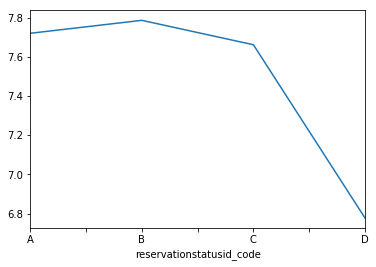

In [80]:
df.groupby('reservationstatusid_code').amount_spent_per_room_night_scaled.mean().plot()    

In [7]:
df['booking_date'].describe()

count                  341424
unique                   1621
top       2016-09-02 00:00:00
freq                     1353
first     2014-09-03 00:00:00
last      2019-03-01 00:00:00
Name: booking_date, dtype: object

In [8]:
df['checkin_date'].describe()

count                  341424
unique                   1532
top       2016-10-08 00:00:00
freq                      460
first     2012-03-08 00:00:00
last      2019-03-01 00:00:00
Name: checkin_date, dtype: object

In [9]:
df['checkout_date'].describe()

count                  341424
unique                   1531
top       2018-10-21 00:00:00
freq                      491
first     2012-03-11 00:00:00
last      2019-03-03 00:00:00
Name: checkout_date, dtype: object

In [10]:
df.shape

(341424, 24)

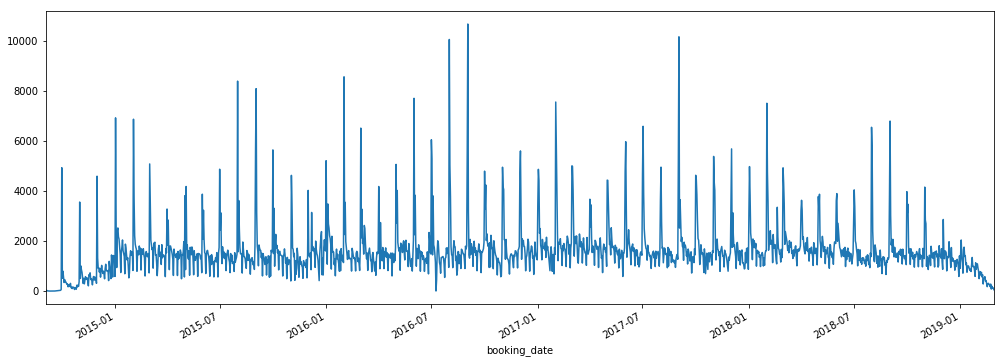

In [57]:
ts=df.groupby('booking_date').amount_spent_per_room_night_scaled.sum()
plt.subplots(figsize=(17,6))
ts.plot()

In [48]:
df['Booking_days']=(df['checkout_date']  - df['checkin_date']).dt.days
df['Bookingbefore']=(df['checkin_date']  - df['booking_date']).dt.days

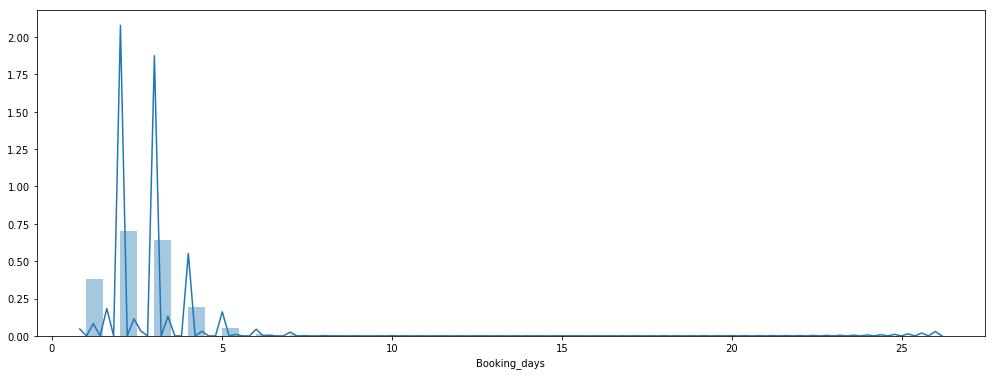

In [13]:
plt.subplots(figsize=(17,6))
sns.distplot(df['Booking_days'])

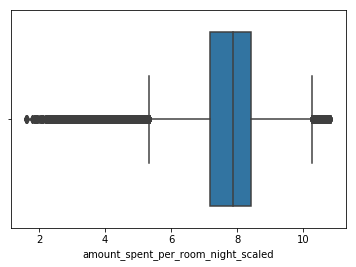

In [52]:
sns.boxplot(df['amount_spent_per_room_night_scaled'])

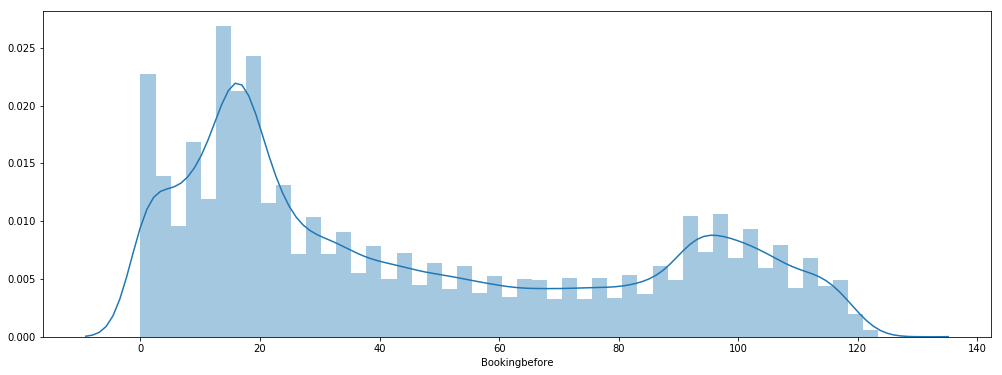

In [49]:
plt.subplots(figsize=(17,6))
sns.distplot(df['Bookingbefore'])

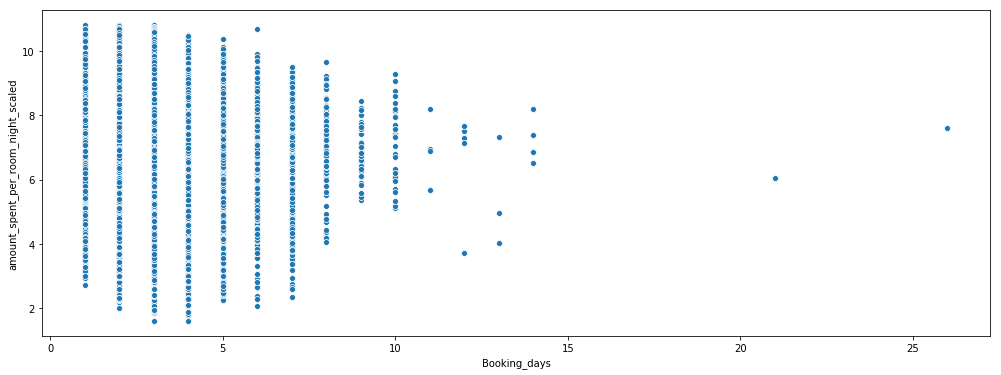

In [51]:
plt.subplots(figsize=(17,6))
sns.scatterplot(x=df.Booking_days,y=df.amount_spent_per_room_night_scaled)

In [14]:
df=df[df['checkout_date']>'2014-09-03']

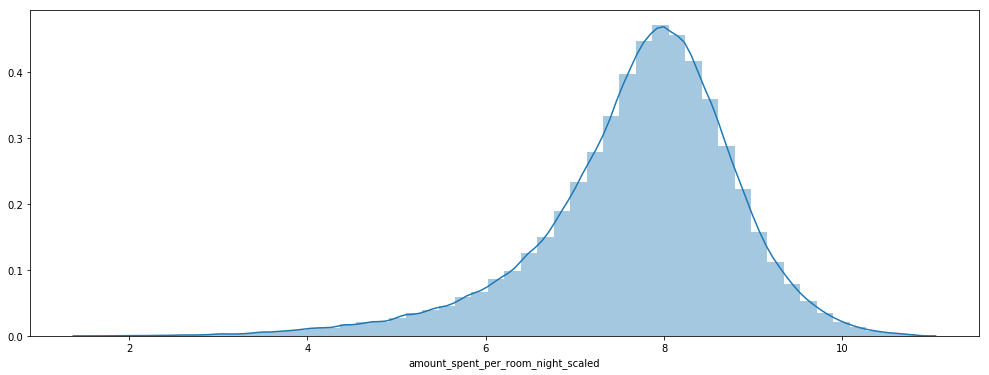

In [15]:
plt.subplots(figsize=(17,6))
sns.distplot(df['amount_spent_per_room_night_scaled'])

In [16]:
df['Total']=df.numberofadults + df.numberofchildren                      

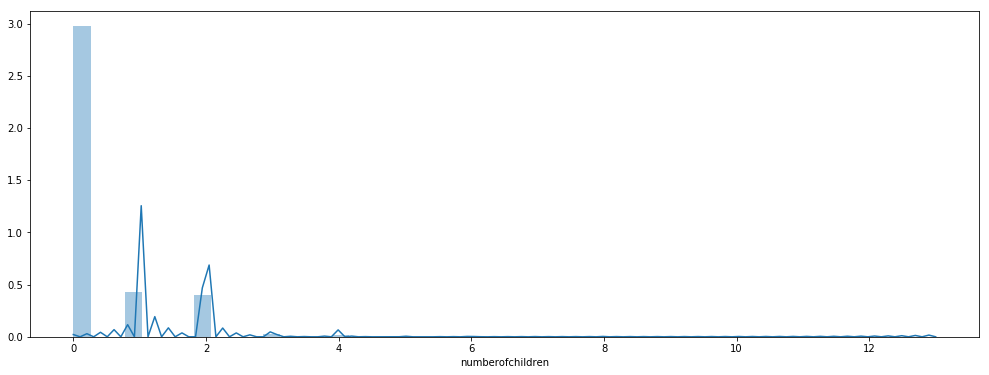

In [17]:
plt.subplots(figsize=(17,6))
sns.distplot(df['numberofchildren'])

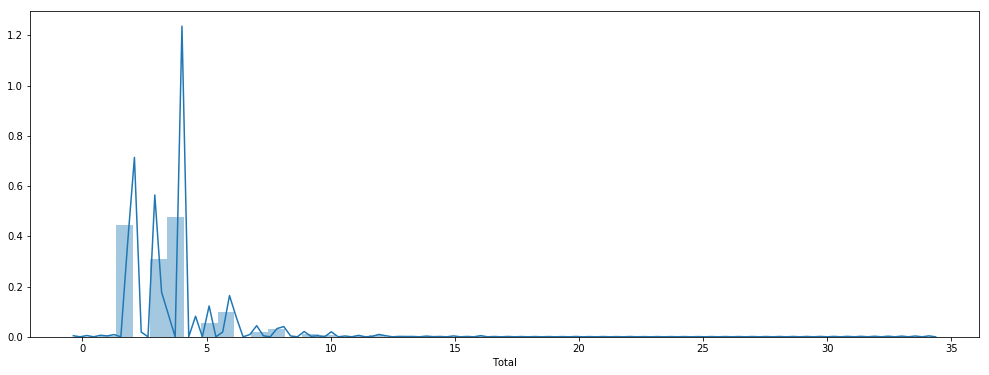

In [18]:
plt.subplots(figsize=(17,6))
sns.distplot(df['Total'])

In [19]:
df.cluster_code.value_counts()

F    120615
E     59828
D     55883
C     37808
B     37669
A     29609
Name: cluster_code, dtype: int64

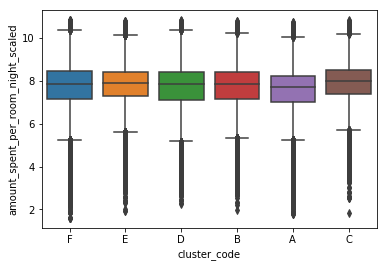

In [20]:
sns.boxplot(x=df.cluster_code , y=df.amount_spent_per_room_night_scaled)

In [21]:
df.channel_code.value_counts()

1    161221
3    128034
2     52157
Name: channel_code, dtype: int64

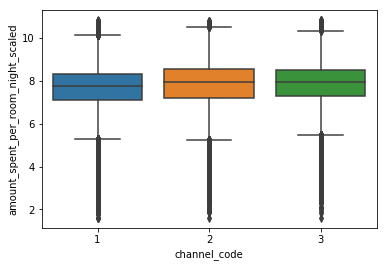

In [22]:
sns.boxplot(x=df.channel_code , y=df.amount_spent_per_room_night_scaled)

In [23]:
df.main_product_code.value_counts()

2    177610
3     86243
1     57819
4     18619
7      1121
Name: main_product_code, dtype: int64

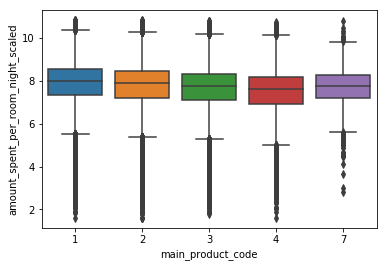

In [24]:
sns.boxplot(x=df.main_product_code , y=df.amount_spent_per_room_night_scaled)

In [25]:
df.persontravellingid.value_counts()

45      267296
47       31580
46       30568
4752     10556
4753      1391
4995        21
Name: persontravellingid, dtype: int64

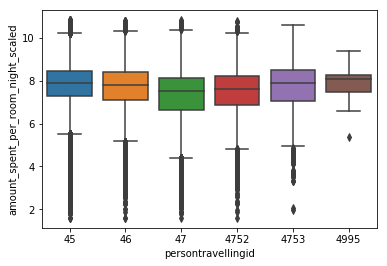

In [26]:
sns.boxplot(x=df.persontravellingid , y=df.amount_spent_per_room_night_scaled)

In [27]:
df.resort_region_code.value_counts()

1    143783
2    131360
3     66269
Name: resort_region_code, dtype: int64

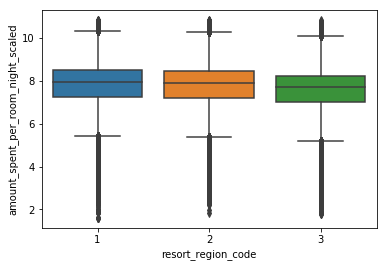

In [28]:
sns.boxplot(x=df.resort_region_code , y=df.amount_spent_per_room_night_scaled)

In [29]:
df.resort_type_code.value_counts()

1    154318
2     74152
3     48677
5     26706
4     21619
7     11478
0      4462
Name: resort_type_code, dtype: int64

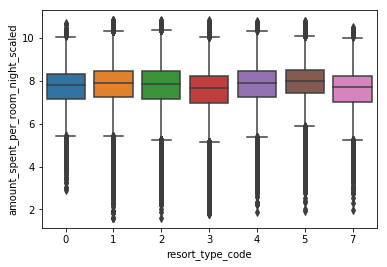

In [30]:
sns.boxplot(x=df.resort_type_code , y=df.amount_spent_per_room_night_scaled)

In [31]:
df.room_type_booked_code.value_counts()

3    137433
2    113455
4     83552
1      5374
5      1588
6        10
Name: room_type_booked_code, dtype: int64

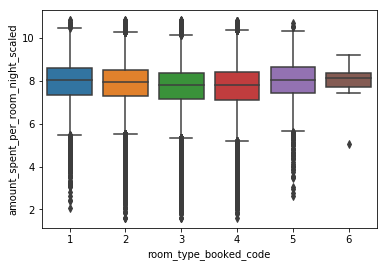

In [32]:
sns.boxplot(x=df.room_type_booked_code , y=df.amount_spent_per_room_night_scaled)

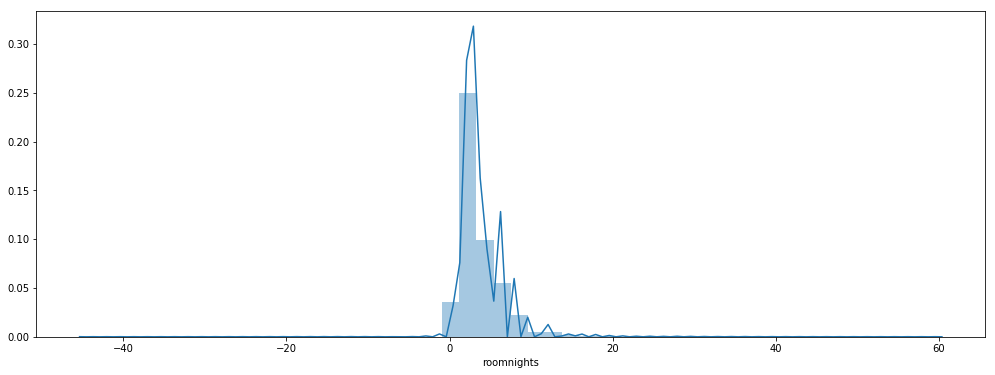

In [33]:
plt.subplots(figsize=(17,6))
sns.distplot(df['roomnights'])

In [34]:
df=df[df['roomnights']>0]

In [35]:
df['Total_per']=df[['total_pax','Total']].max(axis=1)

In [36]:
df.member_age_buckets.value_counts()

D    67615
E    66698
F    50967
C    45191
H    38547
G    36080
B    19427
I     8453
A     7054
J     1378
Name: member_age_buckets, dtype: int64

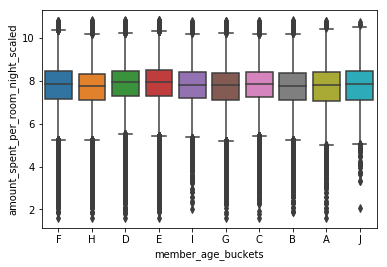

In [37]:
sns.boxplot(x=df.member_age_buckets , y=df.amount_spent_per_room_night_scaled)

In [38]:
df['noofchild']=df['Total_per']-df['numberofadults']

In [39]:
df['haschild']=np.where(df['noofchild']>0,1,0)

In [40]:
df['haschild'].value_counts()

0    187427
1    153983
Name: haschild, dtype: int64

In [78]:
df=df.drop(['numberofchildren','total_pax','Total'],1)

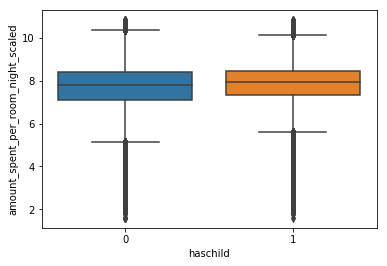

In [41]:
sns.boxplot(x=df['haschild'] , y=df.amount_spent_per_room_night_scaled)

In [42]:
df.season_holidayed_code.value_counts()

2.0    126764
3.0    118181
4.0     69386
1.0     26965
Name: season_holidayed_code, dtype: int64

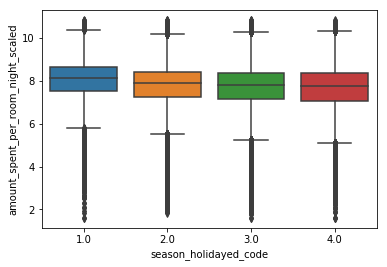

In [43]:
sns.boxplot(x=df['season_holidayed_code'] , y=df.amount_spent_per_room_night_scaled)

In [88]:
df.isna().sum()

reservation_id                        0
booking_date                          0
checkin_date                          0
checkout_date                         0
channel_code                          0
main_product_code                     0
numberofadults                        0
persontravellingid                    0
resort_region_code                    0
resort_type_code                      0
room_type_booked_code                 0
roomnights                            0
season_holidayed_code                 0
state_code_residence                  0
state_code_resort                     0
member_age_buckets                    0
booking_type_code                     0
memberid                              0
cluster_code                          0
reservationstatusid_code              0
resort_id                             0
amount_spent_per_room_night_scaled    0
Booking_days                          0
Total_per                             0
noofchild                             0


In [87]:
df['season_holidayed_code']=df['season_holidayed_code'].fillna(df['season_holidayed_code'].mode()[0])
df['state_code_residence']=df['state_code_residence'].fillna(df['state_code_residence'].mode()[0])                 

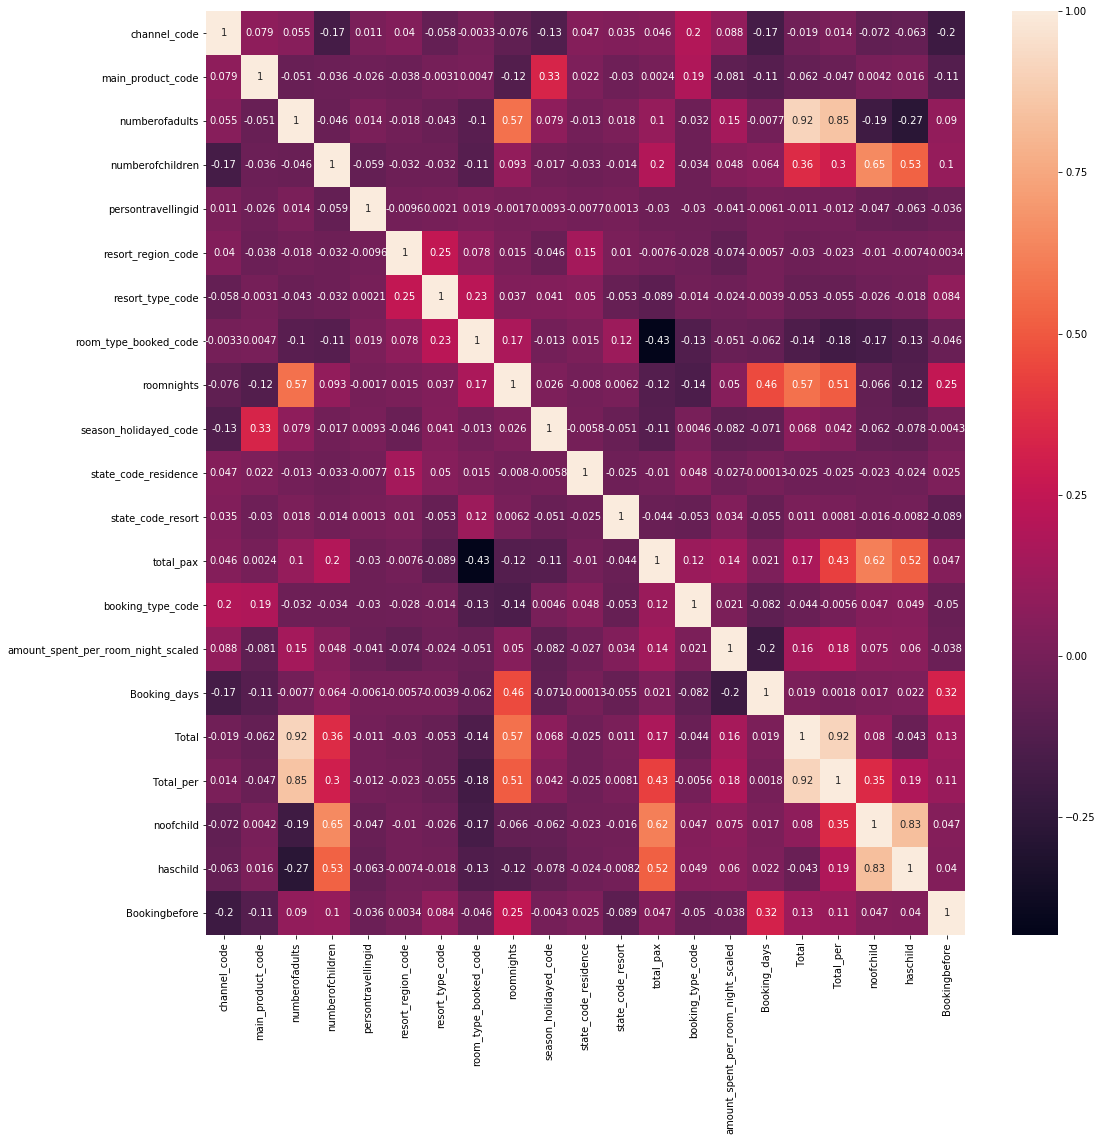

In [56]:
plt.subplots(figsize=(17,17))
sns.heatmap(df.select_dtypes(exclude=['object','datetime64[ns]']).corr(),annot=True)

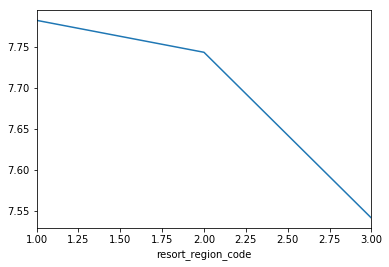

In [75]:
df.groupby('resort_region_code').amount_spent_per_room_night_scaled.mean().plot()

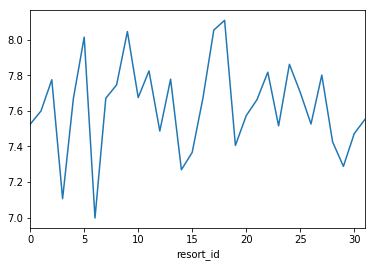

In [92]:
df.groupby('resort_id').amount_spent_per_room_night_scaled.mean().plot()

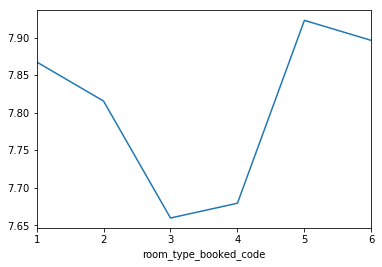

In [76]:
df.groupby('room_type_booked_code').amount_spent_per_room_night_scaled.mean().plot()

In [91]:
lbe=['resort_id','memberid','reservationstatusid_code']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[lbe]=df[lbe].apply(lambda col: le.fit_transform(col))
df[lbe].head()

,resort_id,memberid,reservationstatusid_code
0,7,24179,2
1,1,24179,0
2,9,24179,0
3,25,24179,0
4,25,24179,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341410 entries, 0 to 341423
Data columns (total 33 columns):
channel_code                          341410 non-null int64
main_product_code                     341410 non-null int64
numberofadults                        341410 non-null int64
persontravellingid                    341410 non-null int64
resort_region_code                    341410 non-null int64
resort_type_code                      341410 non-null int64
room_type_booked_code                 341410 non-null int64
roomnights                            341410 non-null int64
season_holidayed_code                 341410 non-null float64
state_code_residence                  341410 non-null float64
state_code_resort                     341410 non-null int64
member_age_buckets                    341410 non-null object
booking_type_code                     341410 non-null int64
memberid                              341410 non-null int32
cluster_code                          341410

In [97]:
dates=df.select_dtypes(include=['datetime64[ns]'])

In [98]:
df=df.drop(dates,1)

In [99]:
df=df.drop('reservation_id',1)

In [ ]:
df['persontravellingid']
df['resort_region_code']
df['season_holidayed_code']


In [128]:
#on hot 

In [102]:
df.shape

(341410, 47)

In [103]:
train1=df.drop('amount_spent_per_room_night_scaled',1)
y=df['amount_spent_per_room_night_scaled']

In [104]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y= train_test_split(train1, y, test_size=0.30, random_state=123)

In [127]:
import xgboost as xgb
import gc
feature=train1.columns.tolist()
gc.collect()

20

In [122]:
param = {'objective' : 'reg:linear',
            'eta' : 0.01,
            'max_depth' : 10,
            'silent' : 1,
            'eval_metric' : "rmse",
            'min_child_weight' : 3,
            'nthread' : 16,
            'subsample' : 0.8,
            'colsample_bytree' : 0.8,
            'seed' : 1}

para = list(param.items())

xgtrain = xgb.DMatrix(train_x, train_y, feature_names=feature)
xgval = xgb.DMatrix(val_x, val_y, feature_names=feature)
#xgtest = xgb.DMatrix(test1, feature_names=feature)
    
watchlist = [ (xgtrain,'train'), (xgval, 'valid') ]
model = xgb.train(para, xgtrain, num_boost_round=3000, evals= watchlist, early_stopping_rounds=20, verbose_eval = 10)   
    


[0]	train-rmse:7.08985	valid-rmse:7.08348
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 20 rounds.
[10]	train-rmse:5.27382	valid-rmse:5.26857
[20]	train-rmse:3.94819	valid-rmse:3.94462
[30]	train-rmse:2.98851	valid-rmse:2.98738
[40]	train-rmse:2.30242	valid-rmse:2.30535
[50]	train-rmse:1.82088	valid-rmse:1.82938
[60]	train-rmse:1.49212	valid-rmse:1.50726
[70]	train-rmse:1.27564	valid-rmse:1.29835
[80]	train-rmse:1.13847	valid-rmse:1.16872
[90]	train-rmse:1.05405	valid-rmse:1.09096
[100]	train-rmse:1.00266	valid-rmse:1.04594
[110]	train-rmse:0.97112	valid-rmse:1.02018
[120]	train-rmse:0.951825	valid-rmse:1.00566
[130]	train-rmse:0.939117	valid-rmse:0.997419
[140]	train-rmse:0.93006	valid-rmse:0.992763
[150]	train-rmse:0.923229	valid-rmse:0.990046
[160]	train-rmse:0.918112	valid-rmse:0.988525
[170]	train-rmse:0.913582	valid-rmse:0.987535
[180]	train-rmse:0.909664	valid-rmse:0.987037
[190]	train-rmse:0

In [114]:
#train-rmse:0.830649	valid-rmse:0.985756

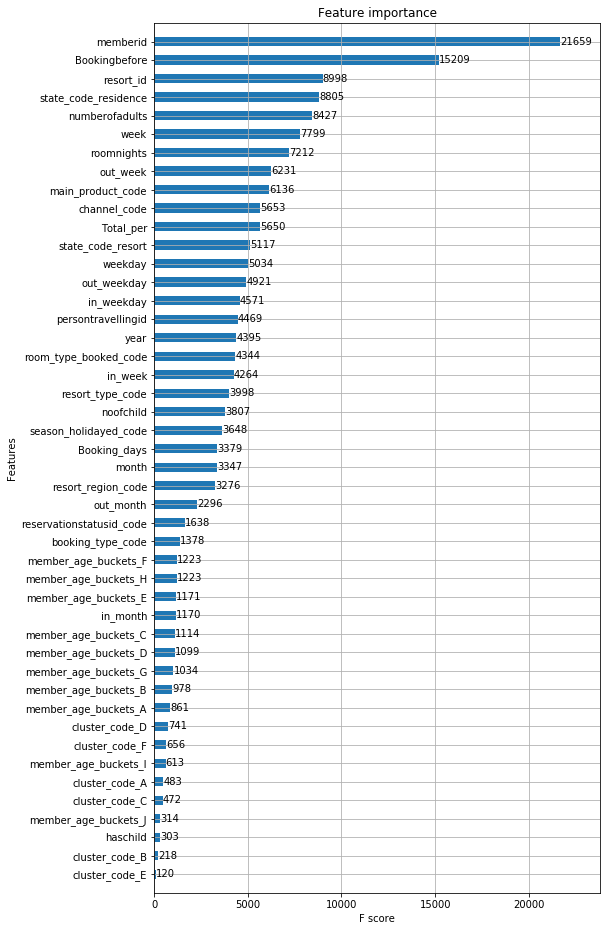

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)